# Setup

In [391]:
import pandas as pd
import numpy as np
import pandas_datareader.data as web
import datetime
import requests_cache
import time
import random
import traceback
import shelve
import plotly.plotly as py # online
#import plotly.offline as py # offline
import cufflinks as cf
cf.set_config_file(offline=False, world_readable=True, theme='ggplot')
import matplotlib.pyplot as plt
%matplotlib inline
from gurobipy import *
from math import sqrt

# cache requests
expire_after = datetime.timedelta(days=14)
session = requests_cache.CachedSession(cache_name='cache', backend='sqlite',
                                       expire_after=expire_after)
start = datetime.datetime(2015, 1, 1)
end = datetime.datetime.now() - datetime.timedelta(days=1)
source = 'google'
sp = ['MMM', 'ABT', 'ABBV', 'ACN', 'ATVI', 'AYI', 'ADBE', 'AMD', 'AAP', 'AES',
      'AET', 'AMG', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALXN',
      'ALGN', 'ALLE', 'AGN', 'ADS', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN',
      'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME',
      'AMGN', 'APH', 'APC', 'ADI', 'ANDV', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA',
      'AIV', 'AAPL', 'AMAT', 'APTV', 'ADM', 'ARNC', 'AJG', 'AIZ', 'T', 'ADSK',
      'ADP', 'AZO', 'AVB', 'AVY', 'BHGE', 'BLL', 'BAC', 'BK', 'BAX', 'BBT',
      'BDX', 'BRK.B', 'BBY', 'BIIB', 'BLK', 'HRB', 'BA', 'BKNG', 'BWA', 'BXP',
      'BSX', 'BHF', 'BMY', 'AVGO', 'BF.B', 'CHRW', 'CA', 'COG', 'CDNS', 'CPB',
      'COF', 'CAH', 'CBOE', 'KMX', 'CCL', 'CAT', 'CBG', 'CBS', 'CELG', 'CNC',
      'CNP', 'CTL', 'CERN', 'CF', 'SCHW', 'CHTR', 'CHK', 'CVX', 'CMG', 'CB',
      'CHD', 'CI', 'XEC', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CTXS', 'CLX',
      'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'CXO', 'COP',
      'ED', 'STZ', 'COO', 'GLW', 'COST', 'COTY', 'CCI', 'CSRA', 'CSX', 'CMI',
      'CVS', 'DHI', 'DHR', 'DRI', 'DVA', 'DE', 'DAL', 'XRAY', 'DVN', 'DLR',
      'DFS', 'DISCA', 'DISCK', 'DISH', 'DG', 'DLTR', 'D', 'DOV', 'DWDP', 'DPS',
      'DTE', 'DRE', 'DUK', 'DXC', 'ETFC', 'EMN', 'ETN', 'EBAY', 'ECL', 'EIX',
      'EW', 'EA', 'EMR', 'ETR', 'EVHC', 'EOG', 'EQT', 'EFX', 'EQIX', 'EQR',
      'ESS', 'EL', 'ES', 'RE', 'EXC', 'EXPE', 'EXPD', 'ESRX', 'EXR', 'XOM',
      'FFIV', 'FB', 'FAST', 'FRT', 'FDX', 'FIS', 'FITB', 'FE', 'FISV', 'FLIR',
      'FLS', 'FLR', 'FMC', 'FL', 'F', 'FTV', 'FBHS', 'BEN', 'FCX', 'GPS',
      'GRMN', 'IT', 'GD', 'GE', 'GGP', 'GIS', 'GM', 'GPC', 'GILD', 'GPN', 'GS',
      'GT', 'GWW', 'HAL', 'HBI', 'HOG', 'HRS', 'HIG', 'HAS', 'HCA', 'HCP', 'HP',
      'HSIC', 'HSY', 'HES', 'HPE', 'HLT', 'HOLX', 'HD', 'HON', 'HRL', 'HST',
      'HPQ', 'HUM', 'HBAN', 'HII', 'IDXX', 'INFO', 'ITW', 'ILMN', 'IR', 'INTC',
      'ICE', 'IBM', 'INCY', 'IP', 'IPG', 'IFF', 'INTU', 'ISRG', 'IVZ', 'IPGP',
      'IQV', 'IRM', 'JEC', 'JBHT', 'SJM', 'JNJ', 'JCI', 'JPM', 'JNPR', 'KSU',
      'K', 'KEY', 'KMB', 'KIM', 'KMI', 'KLAC', 'KSS', 'KHC', 'KR', 'LB', 'LLL',
      'LH', 'LRCX', 'LEG', 'LEN', 'LUK', 'LLY', 'LNC', 'LKQ', 'LMT', 'L', 'LOW',
      'LYB', 'MTB', 'MAC', 'M', 'MRO', 'MPC', 'MAR', 'MMC', 'MLM', 'MAS', 'MA',
      'MAT', 'MKC', 'MCD', 'MCK', 'MDT', 'MRK', 'MET', 'MTD', 'MGM', 'KORS',
      'MCHP', 'MU', 'MSFT', 'MAA', 'MHK', 'TAP', 'MDLZ', 'MON', 'MNST', 'MCO',
      'MS', 'MOS', 'MSI', 'MYL', 'NDAQ', 'NOV', 'NAVI', 'NTAP', 'NFLX', 'NWL',
      'NFX', 'NEM', 'NWSA', 'NWS', 'NEE', 'NLSN', 'NKE', 'NI', 'NBL', 'JWN',
      'NSC', 'NTRS', 'NOC', 'NCLH', 'NRG', 'NUE', 'NVDA', 'ORLY', 'OXY', 'OMC',
      'OKE', 'ORCL', 'PCAR', 'PKG', 'PH', 'PDCO', 'PAYX', 'PYPL', 'PNR', 'PBCT',
      'PEP', 'PKI', 'PRGO', 'PFE', 'PCG', 'PM', 'PSX', 'PNW', 'PXD', 'PNC',
      'RL', 'PPG', 'PPL', 'PX', 'PFG', 'PG', 'PGR', 'PLD', 'PRU', 'PEG', 'PSA',
      'PHM', 'PVH', 'QRVO', 'PWR', 'QCOM', 'DGX', 'RRC', 'RJF', 'RTN', 'O',
      'RHT', 'REG', 'REGN', 'RF', 'RSG', 'RMD', 'RHI', 'ROK', 'COL', 'ROP',
      'ROST', 'RCL', 'CRM', 'SBAC', 'SCG', 'SLB', 'STX', 'SEE', 'SRE', 'SHW',
      'SIG', 'SPG', 'SWKS', 'SLG', 'SNA', 'SO', 'LUV', 'SPGI', 'SWK', 'SBUX',
      'STT', 'SRCL', 'SYK', 'STI', 'SYMC', 'SYF', 'SNPS', 'SYY', 'TROW', 'TPR',
      'TGT', 'TEL', 'FTI', 'TXN', 'TXT', 'TMO', 'TIF', 'TWX', 'TJX', 'TMK',
      'TSS', 'TSCO', 'TDG', 'TRV', 'TRIP', 'FOXA', 'FOX', 'TSN', 'UDR', 'ULTA',
      'USB', 'UAA', 'UA', 'UNP', 'UAL', 'UNH', 'UPS', 'URI', 'UTX', 'UHS',
      'UNM', 'VFC', 'VLO', 'VAR', 'VTR', 'VRSN', 'VRSK', 'VZ', 'VRTX', 'VIAB',
      'V', 'VNO', 'VMC', 'WMT', 'WBA', 'DIS', 'WM', 'WAT', 'WEC', 'WFC', 'WELL',
      'WDC', 'WU', 'WRK', 'WY', 'WHR', 'WMB', 'WLTW', 'WYN', 'WYNN', 'XEL',
      'XRX', 'XLNX', 'XL', 'XYL', 'YUM', 'ZBH', 'ZION', 'ZTS']

# Get Historical Stock Data

In [392]:
# Open shelved data
with shelve.open('shelf') as db:
    data = db['sp_data2']

In [393]:
# #Get data from Google Finance

# # data = dict()
# for symbol in set.difference(set(sp),set(data.keys())):
#     try:
#         data[symbol] = \
#             web.DataReader(symbol, data_source=source, start=start, end=end, session=session)
#         time.sleep(15)
#     except Exception:
#         traceback.print_exc()
#         #break

# # Check which stocks weren't downloaded
# print(set.difference(set(sp),set(data.keys())))

# # Shelve data 
# with shelve.open('shelf') as db:
#     db['sp_data3'] = data

In [394]:
data.keys()

dict_keys(['MMM', 'ABT', 'ABBV', 'ACN', 'ATVI', 'AYI', 'ADBE', 'AMD', 'AAP', 'AES', 'AET', 'AMG', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALXN', 'ALGN', 'ALLE', 'AGN', 'ADS', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'APC', 'ADI', 'ANDV', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'AIV', 'AAPL', 'AMAT', 'APTV', 'ADM', 'ARNC', 'AJG', 'AIZ', 'T', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'BHGE', 'BLL', 'BAC', 'BK', 'BAX', 'BBT', 'BDX', 'BRK.B', 'BBY', 'BIIB', 'BLK', 'HRB', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BHF', 'BMY', 'AVGO', 'BF.B', 'CHRW', 'CA', 'COG', 'CDNS', 'CPB', 'COF', 'CAH', 'CBOE', 'KMX', 'CCL', 'CAT', 'CBG', 'CBS', 'CELG', 'CNC', 'CNP', 'CTL', 'CERN', 'CF', 'SCHW', 'CHTR', 'CHK', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'XEC', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CTXS', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'CXO', 'COP', 'ED', 'STZ', 'COO', 'GLW', 'COST', 'COTY', 'CCI', 'CS

In [395]:
print(set.difference(set(sp),set(data.keys())))
print(len(data.keys()))

{'WELL', 'NBL', 'LMT', 'NWL'}
501


# Calculate Daily returns and covariances

In [396]:
for k, m in data.items():
    m['return'] = (m['Close'] - m['Close'].shift(1)) / m['Close'].shift(1)

random.seed(1)
n_subset = 100
    
# smaller subset for testing
d2 = {k: data[k] for k in random.sample([key for key, value in data.items()],n_subset)}
returns = pd.concat([x['return'].fillna(0).replace(np.inf, 0) for x in d2.values()], axis=1,
                    keys=d2.keys())

# returns = pd.concat([x['return'] for x in data.values()], axis=1,
#                     keys=data.keys())

# drop columns if they are all NaN
returns = returns.drop(returns.columns[~returns.notnull().any()], axis=1)

cov_matrix = returns.cov()
means = returns.mean()
returns.columns

Index(['BAX', 'SYMC', 'WM', 'VFC', 'AEP', 'ED', 'ADP', 'IBM', 'TSS', 'HCP',
       'HST', 'MAS', 'FDX', 'SHW', 'CVX', 'AOS', 'ILMN', 'APD', 'MLM', 'ORLY',
       'FLIR', 'GT', 'MSI', 'PX', 'OMC', 'ABT', 'MCHP', 'HAS', 'CCI', 'UTX',
       'OXY', 'CFG', 'SCG', 'AMAT', 'TMO', 'DUK', 'AKAM', 'AMG', 'A', 'RJF',
       'KLAC', 'ATVI', 'DGX', 'FIS', 'MA', 'CHD', 'GM', 'PNR', 'SWKS', 'JNPR',
       'CINF', 'WMB', 'HBI', 'SLG', 'LH', 'CLX', 'EQT', 'CTXS', 'NDAQ', 'XEC',
       'NLSN', 'HPE', 'DVN', 'MU', 'GE', 'PSA', 'LRCX', 'WU', 'AAPL', 'CAT',
       'MYL', 'UDR', 'DISCA', 'AZO', 'EW', 'SPGI', 'XL', 'IPG', 'SIG', 'ISRG',
       'UA', 'CBS', 'DLTR', 'DE', 'UNH', 'IP', 'INTU', 'FLR', 'WLTW', 'ALB',
       'HII', 'CL', 'PEP', 'FBHS', 'GD', 'SRE', 'CDNS', 'ESRX'],
      dtype='object')

In [397]:
#returns.plot()

In [398]:
# plotly
#returns.iplot(filename='pred460_returns_line')

In [399]:
#returns.plot()
# large spike is AMD on Apr 22, 2016
# https://www.zacks.com/stock/news/214432/why-is-advanced-micro-devices-amd-stock-rallying-today

In [400]:
#cov_matrix

In [401]:
#cov_matrix.plot();

In [402]:
# # plotly
#cov_matrix.iplot(kind='heatmap')

In [403]:
def random_weights(n):
    k = np.random.rand(n)
    w = np.asmatrix(k / sum(k))
    return w

In [404]:
def portfolio_perfomance(cov_matrix, means, weights):
    ''' 
    Returns the mean and standard deviation of returns for a random portfolio
    '''
    p = np.asmatrix(means)
    C = np.asmatrix(cov_matrix)
    mu = weights * p.T
    sigma = np.sqrt(weights * C * weights.T)

    return mu, sigma

In [405]:
n_portfolios = 10000
mns, stds = np.column_stack([
    portfolio_perfomance(cov_matrix, means, random_weights(len(means)))
    for _ in range(n_portfolios)
])

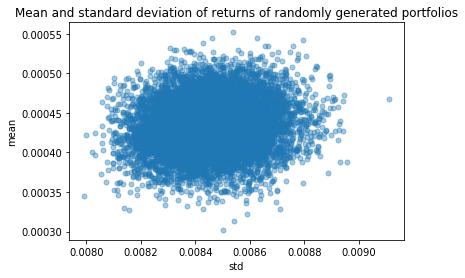

In [406]:
fig = plt.figure()
plt.plot(stds, mns, 'o', markersize=5, alpha=0.4)
plt.xlabel('std')
plt.ylabel('mean')
plt.title('Mean and standard deviation of returns of randomly generated portfolios');
#py.iplot_mpl(fig, filename='mean_std', strip_style=True) # online
#py.iplot_mpl(fig, strip_style=True) # offline

# Optimization

In [407]:
#!/usr/bin/python

# Copyright 2017, Gurobi Optimization, Inc.

# Portfolio selection: given a sum of money to invest, one must decide how to
# spend it amongst a portfolio of financial securities.  Our approach is due
# to Markowitz (1959) and looks to minimize the risk associated with the
# investment while realizing a target expected return.  By varying the target,
# one can compute an 'efficient frontier', which defines the optimal portfolio
# for a given expected return.
#
# Note that this example reads historical return data from a comma-separated
# file (../data/portfolio.csv).  As a result, it must be run from the Gurobi
# examples/python directory.
#
# This example requires the pandas, NumPy, and Matplotlib Python packages,
# which are part of the SciPy ecosystem for mathematics, science, and
# engineering (http://scipy.org).  These packages aren't included in all
# Python distributions, but are included by default with Anaconda Python.

# from gurobipy import *
# from math import sqrt
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt

# Import (normalized) historical return data using pandas
# data = pd.DataFrame.from_csv('../data/portfolio.csv')
# stocks = data.columns

# Calculate basic summary statistics for individual stocks
# stock_volatility = data.std()
# stock_return = data.mean()
# # individual stocks
stock_volatility = returns.std()
stock_return = returns.mean()


In [408]:
# Create an empty model
m = Model('portfolio')

In [409]:
# Add a variable for each stock
stocks = list(stock_volatility.index)
vars = pd.Series(m.addVars(stocks, name=stocks), index=stocks)

In [410]:
# Objective is to minimize risk (squared).  This is modeled using the
# covariance matrix, which measures the historical correlation between stocks.
sigma = cov_matrix
portfolio_risk = sigma.dot(vars).dot(vars)

In [411]:
m.setObjective(portfolio_risk, GRB.MINIMIZE)

In [412]:
# Fix budget with a constraint
m.addConstr(vars.sum() == 1, 'budget')

# Optimize model to find the minimum risk portfolio
m.setParam('OutputFlag', 0)
m.optimize()

In [413]:
# Create an expression representing the expected return for the portfolio
portfolio_return = stock_return.dot(vars)

# Display minimum risk portfolio
print('Minimum Risk Portfolio:\n')
for v in vars:
    if v.x > 0:
        print('\t%s\t: %g' % (v.varname, v.x))
minrisk_volatility = sqrt(portfolio_risk.getValue())
print('\nVolatility      = %g' % minrisk_volatility)
minrisk_return = portfolio_return.getValue()
print('Expected Return = %g' % minrisk_return)

Minimum Risk Portfolio:

	BAX	: 0.017384
	SYMC	: 9.33081e-05
	WM	: 0.108878
	VFC	: 7.48116e-05
	AEP	: 1.2313e-05
	ED	: 0.172408
	ADP	: 3.54794e-06
	IBM	: 0.00293996
	TSS	: 5.40938e-06
	HCP	: 4.6808e-06
	HST	: 2.64109e-06
	MAS	: 1.75386e-06
	FDX	: 3.67656e-06
	SHW	: 0.000106684
	CVX	: 6.83001e-06
	AOS	: 3.07915e-06
	ILMN	: 7.83311e-06
	APD	: 4.74178e-06
	MLM	: 2.44734e-06
	ORLY	: 3.03909e-06
	FLIR	: 0.00577659
	GT	: 2.16877e-06
	MSI	: 0.0507491
	PX	: 0.0203788
	OMC	: 0.00604423
	ABT	: 5.3155e-06
	MCHP	: 4.78606e-06
	HAS	: 0.00810614
	CCI	: 0.0180077
	UTX	: 0.0078455
	OXY	: 0.0158294
	CFG	: 0.0195138
	SCG	: 3.59239e-06
	AMAT	: 2.80384e-06
	TMO	: 5.33365e-06
	DUK	: 0.00235071
	AKAM	: 3.73819e-06
	AMG	: 1.4712e-06
	A	: 3.25575e-06
	RJF	: 6.78422e-06
	KLAC	: 1.6956e-05
	ATVI	: 2.0035e-06
	DGX	: 6.03943e-06
	FIS	: 6.3891e-06
	MA	: 5.54509e-06
	CHD	: 0.042397
	GM	: 2.91156e-05
	PNR	: 3.84857e-06
	SWKS	: 2.0547e-06
	JNPR	: 1.35671e-05
	CINF	: 3.8781e-06
	WMB	: 7.39675e-07
	HBI	: 1.35779e-05
	S

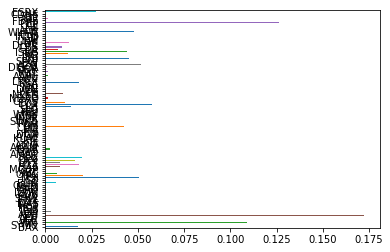

In [414]:
min_alloc = pd.Series(data=[v.x for v in vars if v.x > 0], index=[v.varname for v in vars if v.x > 0])
min_alloc.plot(kind='barh');

In [415]:
# Add (redundant) target return constraint
target = m.addConstr(portfolio_return == minrisk_return, 'target')

In [416]:
def sharpe_ratio(mean, sd, riskfree=0.0):
    return ((mean - riskfree) / sd)

In [417]:
# Solve for efficient frontier by varying target return
max_sharpe_return = -np.Inf
max_sharpe_volitility = -np.Inf
max_sharpe_a = -np.Inf
frontier = pd.Series()
for r in np.linspace(stock_return.min(), stock_return.max(), 100):
    target.rhs = r
    m.optimize()
    frontier.loc[sqrt(portfolio_risk.getValue())] = r
    a = sharpe_ratio(portfolio_return.getValue(), portfolio_risk.getValue())
    if a > max_sharpe_a:
        max_sharpe_a = a
        max_sharpe_return = portfolio_return.getValue()
        max_sharpe_volitility = sqrt(portfolio_risk.getValue())

In [418]:
# Simulated sharpe ratio
s = pd.DataFrame(data={'sd': [float(x) for x in stds], 'mean': [float(x) for x in mns]}, index=range(len(mns)))
s['sharpe_ratio'] = s.apply(lambda row: sharpe_ratio(row['mean'], row['sd']), axis=1)
max_sharpe = s.loc[s['sharpe_ratio'].idxmax()]
s.head()

,mean,sd,sharpe_ratio
0,0.000421,0.008565,0.049113
1,0.000433,0.008475,0.051045
2,0.000402,0.008385,0.047999
3,0.000395,0.008513,0.046399
4,0.000468,0.008558,0.054630


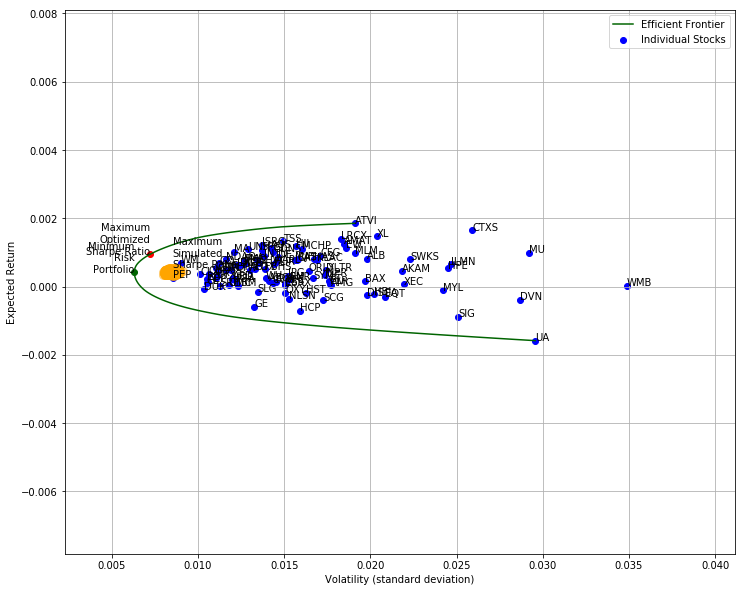

In [419]:
# Plot volatility versus expected return for individual stocks
ax = plt.gca()
fig = plt.gcf()
fig.set_size_inches(12, 10)
ax.scatter(x=stock_volatility, y=stock_return,
           color='Blue', label='Individual Stocks')
for i, stock in enumerate(stocks):
    ax.annotate(stock, (stock_volatility[i], stock_return[i]))
    
# Plot volatility versus expected return for random portolios
plt.plot(stds, mns, 'o', markersize=8, alpha=0.4, color='orange')

# Plot volatility versus expected return for minimum risk portfolio
ax.scatter(x=minrisk_volatility, y=minrisk_return, color='DarkGreen')
ax.annotate('Minimum\nRisk\nPortfolio', (minrisk_volatility, minrisk_return),
            horizontalalignment='right')

# Plot max sharpe ratio from optimization
ax.scatter(x=max_sharpe_volitility, y=max_sharpe_return, color='red')
ax.annotate('Maximum\nOptimized\nSharpe Ratio', (max_sharpe_volitility, max_sharpe_return),
            horizontalalignment='right')

# Plot max sharpe ratio from simulations
ax.scatter(x=max_sharpe['sd'], y=max_sharpe['mean'], color='red')
ax.annotate('Maximum\nSimulated\nSharpe Ratio', (max_sharpe['sd'], max_sharpe['mean']),
            horizontalalignment='left')


# Plot efficient frontier
frontier.plot(color='DarkGreen', label='Efficient Frontier', ax=ax)


# Format and display the final plot
#ax.axis([0.005, 0.025, -0.001, 0.0015])
ax.set_xlabel('Volatility (standard deviation)')
ax.set_ylabel('Daily Expected Return')
ax.legend()
ax.grid()
plt.show()

# Annualized

In [480]:
#!/usr/bin/python

# Copyright 2017, Gurobi Optimization, Inc.

# Portfolio selection: given a sum of money to invest, one must decide how to
# spend it amongst a portfolio of financial securities.  Our approach is due
# to Markowitz (1959) and looks to minimize the risk associated with the
# investment while realizing a target expected return.  By varying the target,
# one can compute an 'efficient frontier', which defines the optimal portfolio
# for a given expected return.
#
# Note that this example reads historical return data from a comma-separated
# file (../data/portfolio.csv).  As a result, it must be run from the Gurobi
# examples/python directory.
#
# This example requires the pandas, NumPy, and Matplotlib Python packages,
# which are part of the SciPy ecosystem for mathematics, science, and
# engineering (http://scipy.org).  These packages aren't included in all
# Python distributions, but are included by default with Anaconda Python.

# from gurobipy import *
# from math import sqrt
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt

# Import (normalized) historical return data using pandas
# data = pd.DataFrame.from_csv('../data/portfolio.csv')
# stocks = data.columns

# Calculate basic summary statistics for individual stocks
# stock_volatility = data.std()
# stock_return = data.mean()
# # individual stocks
stock_volatility = returns.std()
stock_return = returns.mean()

# Annualize return and volitility
stock_return = stock_return.apply(lambda x: (x+1)**252 - 1)
stock_volatility = stock_volatility * sqrt(252)

cov_matrix = (returns* sqrt(252)).cov()

In [481]:
# Create an empty model
m = Model('portfolio')

In [482]:
# Add a variable for each stock
stocks = list(stock_volatility.index)
vars = pd.Series(m.addVars(stocks, name=stocks), index=stocks)

In [483]:
# Objective is to minimize risk (squared).  This is modeled using the
# covariance matrix, which measures the historical correlation between stocks.
sigma = cov_matrix
portfolio_risk = sigma.dot(vars).dot(vars)

In [484]:
m.setObjective(portfolio_risk, GRB.MINIMIZE)

In [485]:
# Fix budget with a constraint
m.addConstr(vars.sum() == 1, 'budget')

# Optimize model to find the minimum risk portfolio
m.setParam('OutputFlag', 0)
m.optimize()

In [486]:
# Create an expression representing the expected return for the portfolio
portfolio_return = stock_return.dot(vars)

# Display minimum risk portfolio
print('Minimum Risk Portfolio:\n')
for v in vars:
    if v.x > 0:
        print('\t%s\t: %g' % (v.varname, v.x))
minrisk_volatility = sqrt(portfolio_risk.getValue())
print('\nVolatility      = %g' % minrisk_volatility)
minrisk_return = portfolio_return.getValue()
print('Expected Return = %g' % minrisk_return)

Minimum Risk Portfolio:

	BAX	: 0.0174139
	SYMC	: 1.88978e-09
	WM	: 0.109099
	VFC	: 1.69086e-09
	AEP	: 6.0327e-10
	ED	: 0.173895
	ADP	: 2.5934e-10
	IBM	: 0.00301083
	TSS	: 2.95806e-10
	HCP	: 3.18459e-10
	HST	: 1.82113e-10
	MAS	: 1.28962e-10
	FDX	: 2.74069e-10
	SHW	: 2.31104e-09
	CVX	: 4.2591e-10
	AOS	: 1.99709e-10
	ILMN	: 2.88915e-10
	APD	: 3.33354e-10
	MLM	: 1.59967e-10
	ORLY	: 2.88968e-10
	FLIR	: 0.00579383
	GT	: 1.59953e-10
	MSI	: 0.0509443
	PX	: 0.0208744
	OMC	: 0.0063831
	ABT	: 2.79915e-10
	MCHP	: 2.64065e-10
	HAS	: 0.00822566
	CCI	: 0.0181928
	UTX	: 0.00856183
	OXY	: 0.0159413
	CFG	: 0.0196894
	SCG	: 2.5085e-10
	AMAT	: 1.70601e-10
	TMO	: 3.17153e-10
	DUK	: 1.77421e-05
	AKAM	: 2.78639e-10
	AMG	: 1.07582e-10
	A	: 2.11206e-10
	RJF	: 3.50831e-10
	KLAC	: 5.77908e-10
	ATVI	: 1.40688e-10
	DGX	: 4.513e-10
	FIS	: 4.03339e-10
	MA	: 3.02675e-10
	CHD	: 0.0425543
	GM	: 8.10371e-10
	PNR	: 2.58234e-10
	SWKS	: 1.20511e-10
	JNPR	: 5.4609e-10
	CINF	: 2.76458e-10
	WMB	: 7.44162e-11
	HBI	: 5.16888e-

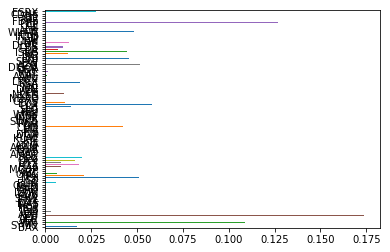

In [487]:
min_alloc = pd.Series(data=[v.x for v in vars if v.x > 0], index=[v.varname for v in vars if v.x > 0])
min_alloc.plot(kind='barh');

In [488]:
# Add (redundant) target return constraint
target = m.addConstr(portfolio_return == minrisk_return, 'target')

In [489]:
def sharpe_ratio(mean, sd, riskfree=0.0):
    return ((mean - riskfree) / sd)

In [490]:
# Solve for efficient frontier by varying target return
max_sharpe_return = -np.Inf
max_sharpe_volitility = -np.Inf
max_sharpe_a = -np.Inf
frontier = pd.Series()
for r in np.linspace(stock_return.min(), stock_return.max(), 100):
    target.rhs = r
    m.optimize()
    frontier.loc[sqrt(portfolio_risk.getValue())] = r
    a = sharpe_ratio(portfolio_return.getValue(), portfolio_risk.getValue())
    if a > max_sharpe_a:
        max_sharpe_a = a
        max_sharpe_return = portfolio_return.getValue()
        max_sharpe_volitility = sqrt(portfolio_risk.getValue())

In [491]:
# Simulated sharpe ratio
s = pd.DataFrame(data={'sd': [float(x) for x in stds], 'mean': [float(x) for x in mns]}, index=range(len(mns)))
s['sharpe_ratio'] = s.apply(lambda row: sharpe_ratio(row['mean'], row['sd']), axis=1)
max_sharpe = s.loc[s['sharpe_ratio'].idxmax()]
s.head()

,mean,sd,sharpe_ratio
0,0.000421,0.008565,0.049113
1,0.000433,0.008475,0.051045
2,0.000402,0.008385,0.047999
3,0.000395,0.008513,0.046399
4,0.000468,0.008558,0.054630


In [502]:
ivv = web.DataReader('IVV', data_source=source, start=start, end=end, session=session)
with shelve.open('shelf') as db:
    db['ivv'] = ivv

C:\Users\austi\.conda\envs\py36\lib\site-packages\pandas_datareader\google\daily.py:40: UnstableAPIWarning:


The Google Finance API has not been stable since late 2017. Requests seem
to fail at random. Failure is especially common when bulk downloading.




In [504]:
ivv['return'] = (ivv['Close'] - ivv ['Close'].shift(1)) / ivv['Close'].shift(1)
ivv['return'] = ivv['return'].fillna(0).replace(np.inf, 0) 

In [512]:
ivv_mean = (ivv['return'].mean()+1)**252 - 1
ivv_std = ivv['return'].std()*sqrt(252)

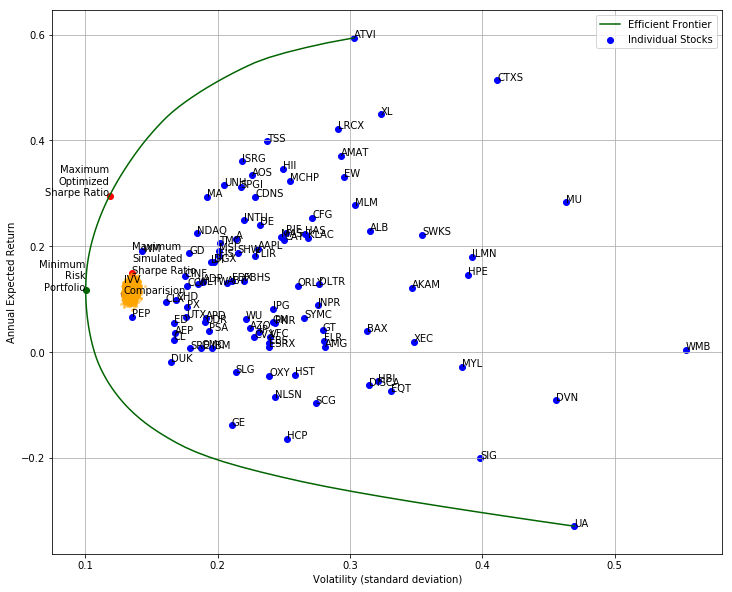

In [531]:
# Plot volatility versus expected return for individual stocks
ax = plt.gca()
fig = plt.gcf()
fig.set_size_inches(12, 10)
ax.scatter(x=stock_volatility, y=stock_return,
           color='Blue', label='Individual Stocks')
for i, stock in enumerate(stocks):
    ax.annotate(stock, (stock_volatility[i], stock_return[i]))
    
# Plot volatility versus expected return for random portolios
plt.plot(stds*sqrt(252), (mns+1)**252 - 1, 'o', markersize=2, alpha=0.4, color='orange')

# Plot volatility versus expected return for minimum risk portfolio
ax.scatter(x=minrisk_volatility, y=minrisk_return, color='DarkGreen')
ax.annotate('Minimum\nRisk\nPortfolio', (minrisk_volatility, minrisk_return),
            horizontalalignment='right')

# stock_return = stock_return.apply(lambda x: (x+1)**252 - 1)
# stock_volatility = stock_volatility * sqrt(252)

# Plot max sharpe ratio from optimization
ax.scatter(x=max_sharpe_volitility, y=max_sharpe_return, color='red')
ax.annotate('Maximum\nOptimized\nSharpe Ratio', (max_sharpe_volitility, max_sharpe_return),
            horizontalalignment='right')

# Plot max sharpe ratio from simulations
ax.scatter(x=max_sharpe['sd']*sqrt(252), y=(max_sharpe['mean']+1)**252 - 1, color='red')
ax.annotate('Maximum\nSimulated\nSharpe Ratio', (max_sharpe['sd']*sqrt(252), (max_sharpe['mean']+1)**252 - 1),
            horizontalalignment='left')


# Plot efficient frontier
frontier.plot(color='DarkGreen', label='Efficient Frontier', ax=ax)

# Plot IVV
ax.scatter(x=ivv_std, y=ivv_mean, color='blue')
ax.annotate('IVV\nComparision', (ivv_std, ivv_mean),
            horizontalalignment='left')


# Format and display the final plot
#ax.axis([0.005, 0.025, -0.001, 0.0015])
ax.set_xlabel('Volatility (standard deviation)')
ax.set_ylabel('Annual Expected Return')
ax.legend()
ax.grid()
plt.show()

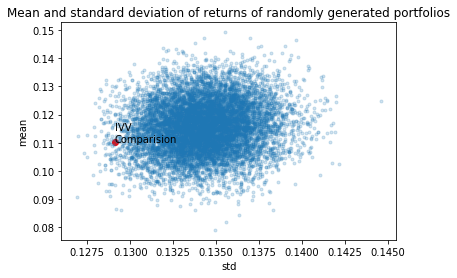

In [524]:
fig = plt.figure()
ax = plt.gca()
plt.plot(stds*sqrt(252), (mns+1)**252 - 1, 'o', markersize=3, alpha=0.2)
# Plot IVV
ax.scatter(x=ivv_std, y=ivv_mean, color='red')
ax.annotate('IVV\nComparision', (ivv_std, ivv_mean),
            horizontalalignment='left')
plt.xlabel('std')
plt.ylabel('mean')
plt.title('Mean and standard deviation of returns of randomly generated portfolios');
#py.iplot_mpl(fig, filename='mean_std', strip_style=True) # online
#py.iplot_mpl(fig, strip_style=True) # offline

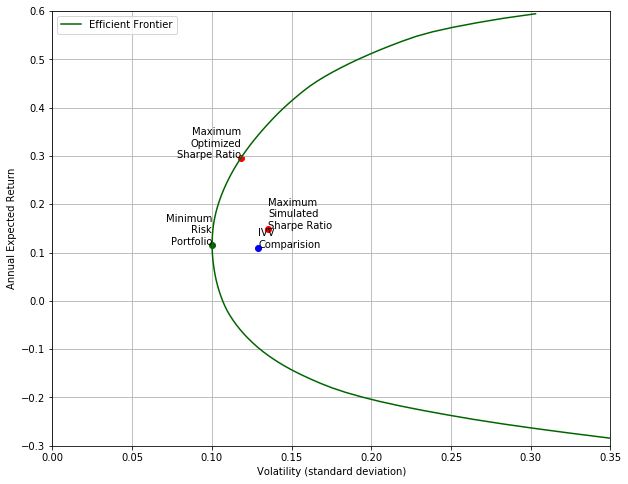

In [530]:
# Plot volatility versus expected return for individual stocks
ax = plt.gca()
fig = plt.gcf()
fig.set_size_inches(10, 8)


# Plot volatility versus expected return for minimum risk portfolio
ax.scatter(x=minrisk_volatility, y=minrisk_return, color='DarkGreen')
ax.annotate('Minimum\nRisk\nPortfolio', (minrisk_volatility, minrisk_return),
            horizontalalignment='right')

# stock_return = stock_return.apply(lambda x: (x+1)**252 - 1)
# stock_volatility = stock_volatility * sqrt(252)

# Plot max sharpe ratio from optimization
ax.scatter(x=max_sharpe_volitility, y=max_sharpe_return, color='red')
ax.annotate('Maximum\nOptimized\nSharpe Ratio', (max_sharpe_volitility, max_sharpe_return),
            horizontalalignment='right')

# Plot max sharpe ratio from simulations
ax.scatter(x=max_sharpe['sd']*sqrt(252), y=(max_sharpe['mean']+1)**252 - 1, color='red')
ax.annotate('Maximum\nSimulated\nSharpe Ratio', (max_sharpe['sd']*sqrt(252), (max_sharpe['mean']+1)**252 - 1),
            horizontalalignment='left')


# Plot efficient frontier
frontier.plot(color='DarkGreen', label='Efficient Frontier', ax=ax)

# Plot IVV
ax.scatter(x=ivv_std, y=ivv_mean, color='blue')
ax.annotate('IVV\nComparision', (ivv_std, ivv_mean),
            horizontalalignment='left')


# Format and display the final plot
ax.axis([0.0, 0.35, -0.3, 0.6])
ax.set_xlabel('Volatility (standard deviation)')
ax.set_ylabel('Annual Expected Return')
ax.legend()
ax.grid()
plt.show()